In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://huggingface.co/datasets/nprak26/remote-worker-productivity/raw/main/remote_work_productivity.csv"
df = pd.read_csv(url)

In [3]:
relevant_columns = ['Age', 'Years_Experience', 'Work_Hours_Per_Week', 'Productivity_Score', 
                    'Meetings_Per_Week', 'Job_Satisfaction', 'Education_Level', 'Department', 
                    'Job_Level', 'Has_Children', 'Location_Type', 'Company_Size', 'WFH_Days_Per_Week']
df = df[relevant_columns]

In [4]:
total_missing = df.isnull().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


In [5]:
# Group categorical features
df['Department_Group'] = df['Department'].apply(lambda x: 'Tech' if x in ['Engineering', 'Data Science', 'Product', 'Design'] else 'Non-Tech')
df['Education_Group'] = df['Education_Level'].replace({
    'High School': 'Basic', 'Associate Degree': 'Basic',
    'Bachelor Degree': 'Bachelor/Master', 'Master Degree': 'Bachelor/Master',
    'PhD': 'Advanced', 'Professional Degree': 'Advanced'
})
df['Job_Level_Group'] = df['Job_Level'].apply(lambda x: 'Junior' if x in ['Junior', 'Mid-Level'] else 'Senior')
df['Company_Size_Group'] = df['Company_Size'].apply(lambda x: 'Small' if x in ['Startup (1-50)', 'Small (51-200)'] else 'Large')

In [6]:
# Drop original columns after grouping
df_engineered = df.drop(columns=['Department', 'Education_Level', 'Job_Level', 'Company_Size'])

In [7]:
# Create target variable
df_engineered['WFH_Category'] = pd.cut(df_engineered['WFH_Days_Per_Week'], bins=[-1, 1, 3, 5], labels=['Low', 'Medium', 'High'])

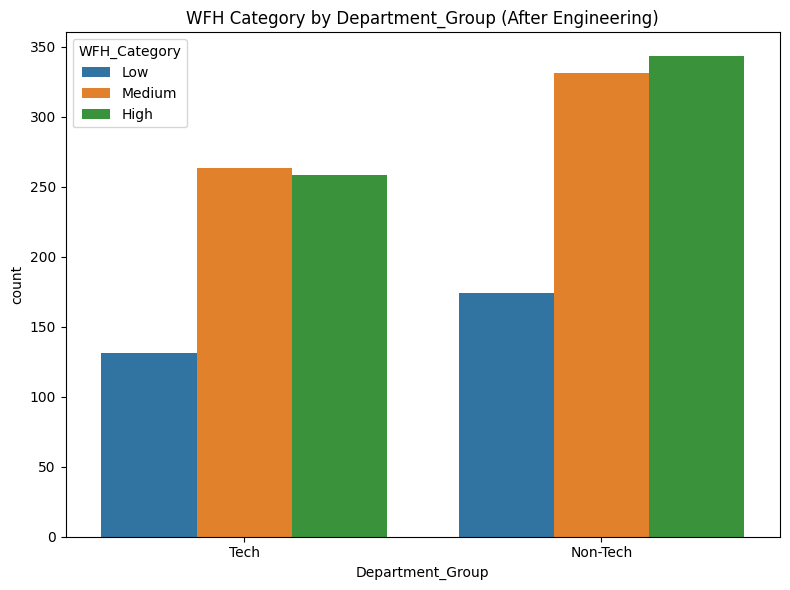

In [8]:
# Countplot of WFH_Category by Department_Group
plt.figure(figsize=(8, 6))
sns.countplot(x='Department_Group', hue='WFH_Category', data=df_engineered)
plt.title("WFH Category by Department_Group (After Engineering)")
plt.tight_layout()
plt.savefig("../results/eda_visualizations/wfh_by_department_group.png")
plt.show()

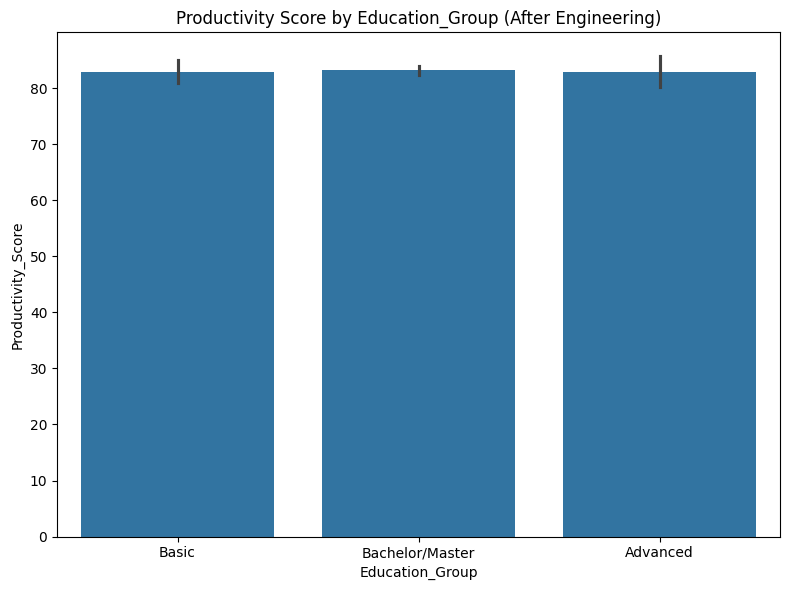

In [9]:
# Barplot of Productivity_Score by Education_Group (impact of engineering - shows group averages)
plt.figure(figsize=(8, 6))
sns.barplot(x='Education_Group', y='Productivity_Score', data=df_engineered)
plt.title("Productivity Score by Education_Group (After Engineering)")
plt.tight_layout()
plt.savefig("../results/eda_visualizations/productivity_by_education_group.png")
plt.show()